## Important

##### Borrower - age, income, city
#####  A credit contract can have several and different types of counterparties. The same credit contract is represented by as many rows as there are individuals associated with it.
##### the identifier of the contracting parties may appear in more than one credit contract, if someone has signed more than one contract in a given **three-year**period.
##### The data are characterised by some changes and inconsistencies in the new rows added for the same contract due to contracting parties with attributes related to the contract. For example, it may be the case that for a loan contract with two borrowers, **CONTRACT_DATE_OF_LOAN_AGREEMENT** is different.
##### the value **'E'** in the **TARGET_EVENT** : prepaid
##### **TARGET_EVENT_DAY**: date of the prepaid
##### **TARGET_EVENT** field takes the value **'K'**: default (the minimum wage for at least 90 days)
##### **TARGET_EVENT_DAY**: encodes the date of default

##### If they were prepaid later or defaulted later, there is no direct information about this in the data set.
### TARGET  
##### customers, who have **at least one loan contract** in the issued dataset, but **none of their loan contracts have defaulted in the three years or have not yet repaid** all their loan contracts in the three-year period.**The task** is to calculate a **probability** value expressing the probability that one of their credit contracts will **default in the two years** following the period of the initial data set.
##### **1.48%** of the affected borrowers defaulted over the two-year period

## Wrong solution
##### Less or more rows (The expected number of rows is 1,117,675, with the top row containing column names)
##### More columns
##### Comma instead of decimal point
##### Wrong order of company identifiers
##### Unknown identifiers
##### multiple occurrences of identifiers

### Import files

In [1]:
import pandas as pd

df = pd.read_csv('training_data.csv')
df_ex = pd.read_csv('data_submission_example.csv')



In [ ]:
df.head()

In [3]:
print(df_ex.head())
print("training: ",len(df))
print("example_data: ",len(df_ex))
print(df.info())
print(df_ex.info())

  BORROWER_ID      PRED
0    +++b/oYx  0.014477
1    +++pcjqH  0.014477
2    +++ukYrT  0.014477
3    +++wvYn7  0.014477
4    ++/6JzSJ  0.014477
training:  1602753
example_data:  1117674
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602753 entries, 0 to 1602752
Data columns (total 34 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   CONTRACT_ID                          1602753 non-null  object 
 1   BORROWER_ID                          1602753 non-null  object 
 2   CONTRACT_BANK_ID                     1602753 non-null  object 
 3   CONTRACT_CREDIT_INTERMEDIARY         1543331 non-null  float64
 4   CONTRACT_CREDIT_LOSS                 1566599 non-null  float64
 5   CONTRACT_CURRENCY                    1602753 non-null  int64  
 6   CONTRACT_DATE_OF_LOAN_AGREEMENT      1602753 non-null  int64  
 7   CONTRACT_DEPT_SERVICE_TO_INCOME      1401273 non-null  float64
 8   CONTRACT_FREQUEN

### Preprocessing

In [ ]:
# every ID unique
df_ex['BORROWER_ID'].value_counts().max()

In [ ]:
# some ID not unique
df['BORROWER_ID'].value_counts()

In [27]:
null_df = df[df['BORROWER_ID']=='xNullx']


In [ ]:
# 1090 rows with null ID 
# 1042 rows with null ID and TARGET_EVENT = '-'
null_df

In [29]:
# drop null ID rows
df.drop(null_df.index, inplace=True)


In [ ]:
df

In [ ]:
for column in df.columns:
     print("\n" + column)
     print(df[column].value_counts())

### Columns

In [5]:
df.columns

Index(['CONTRACT_ID', 'BORROWER_ID', 'CONTRACT_BANK_ID',
       'CONTRACT_CREDIT_INTERMEDIARY', 'CONTRACT_CREDIT_LOSS',
       'CONTRACT_CURRENCY', 'CONTRACT_DATE_OF_LOAN_AGREEMENT',
       'CONTRACT_DEPT_SERVICE_TO_INCOME', 'CONTRACT_FREQUENCY_TYPE',
       'CONTRACT_INCOME', 'CONTRACT_INSTALMENT_AMOUNT',
       'CONTRACT_INSTALMENT_AMOUNT_2', 'CONTRACT_INTEREST_PERIOD',
       'CONTRACT_INTEREST_RATE', 'CONTRACT_LGD', 'CONTRACT_LOAN_AMOUNT',
       'CONTRACT_LOAN_CONTRACT_TYPE', 'CONTRACT_LOAN_TO_VALUE_RATIO',
       'CONTRACT_LOAN_TYPE', 'CONTRACT_MARKET_VALUE', 'CONTRACT_MATURITY_DATE',
       'CONTRACT_MORTGAGE_LENDING_VALUE', 'CONTRACT_MORTGAGE_TYPE',
       'CONTRACT_REFINANCED', 'CONTRACT_RISK_WEIGHTED_ASSETS',
       'CONTRACT_TYPE_OF_INTEREST_REPAYMENT', 'BORROWER_BIRTH_YEAR',
       'BORROWER_CITIZENSHIP', 'BORROWER_COUNTRY', 'BORROWER_COUNTY',
       'BORROWER_TYPE_OF_CUSTOMER', 'BORROWER_TYPE_OF_SETTLEMENT',
       'TARGET_EVENT', 'TARGET_EVENT_DAY'],
      dtype='object')

Órai munka
Első évben indított ügyletek

In [106]:
import pandas as pd

origdf = pd.read_csv('training_data.csv')
subm = pd.read_csv('data_submission_example.csv')

In [20]:
subm

,BORROWER_ID,PRED
0,+++b/oYx,0.014477
1,+++pcjqH,0.014477
2,+++ukYrT,0.014477
3,+++wvYn7,0.014477
4,++/6JzSJ,0.014477
...,...,...
1117669,zzzAk2cT,0.014477
1117670,zzzUlMwd,0.014477
1117671,zzzf5tKU,0.014477
1117672,zzzjSsQj,0.014477


In [107]:
df = origdf.copy()

<Axes: >

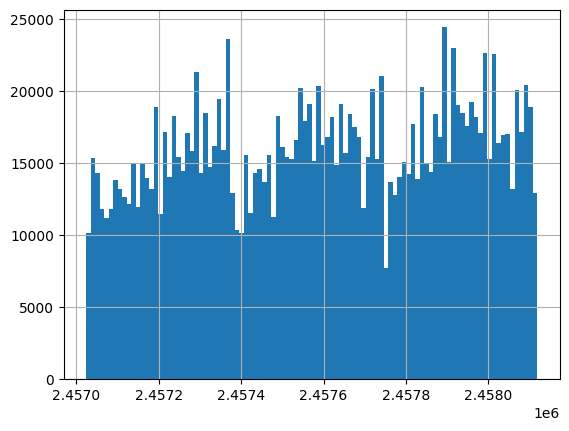

In [3]:
df['CONTRACT_DATE_OF_LOAN_AGREEMENT'].hist(bins=100)

<Axes: >

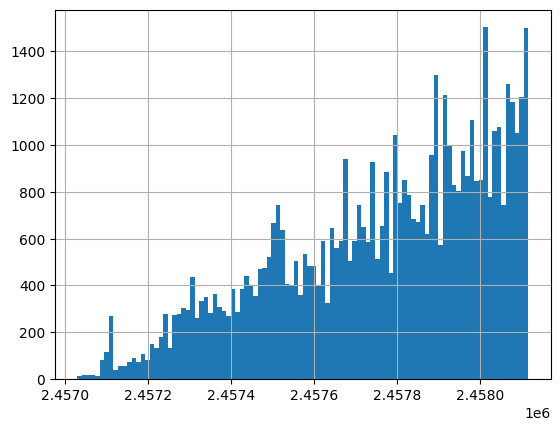

In [4]:
df['TARGET_EVENT_DAY'].hist(bins=100)

In [21]:
specidf = df[df['TARGET_EVENT']!='-'].copy()

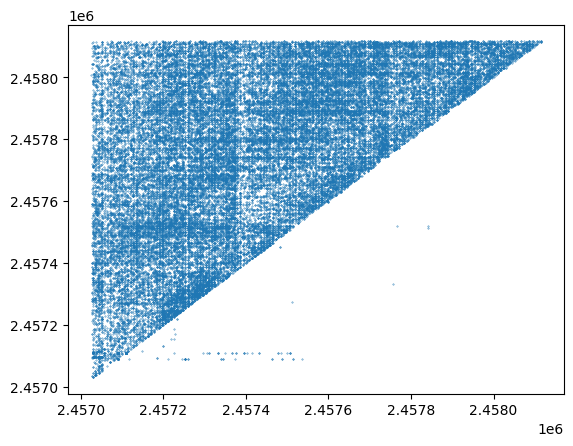

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(specidf['CONTRACT_DATE_OF_LOAN_AGREEMENT'],specidf['TARGET_EVENT_DAY'],s=0.1)

In [22]:
#specidf.sort_values(['CONTRACT_DATE_OF_LOAN_AGREEMENT','TARGET_EVENT_DAY'])

,CONTRACT_ID,BORROWER_ID,CONTRACT_BANK_ID,CONTRACT_CREDIT_INTERMEDIARY,CONTRACT_CREDIT_LOSS,CONTRACT_CURRENCY,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_FREQUENCY_TYPE,CONTRACT_INCOME,...,CONTRACT_RISK_WEIGHTED_ASSETS,CONTRACT_TYPE_OF_INTEREST_REPAYMENT,BORROWER_BIRTH_YEAR,BORROWER_CITIZENSHIP,BORROWER_COUNTRY,BORROWER_COUNTY,BORROWER_TYPE_OF_CUSTOMER,BORROWER_TYPE_OF_SETTLEMENT,TARGET_EVENT,TARGET_EVENT_DAY
296628,HaDuhZ8,NDneIuwz,f789f8b0,2.0,238052.0,31,2457024,27.35,479a2e13,421461.0,...,96.69,140002.0,1240.0,98.0,98.0,163.0,A,2.0,K,2458008.0
1424714,rrn-5qiM,+0NOwYK0,1d42bbf5,2.0,252761.0,31,2457028,NaN,479a2e13,NaN,...,74.83,100002.0,1232.0,98.0,98.0,97.0,B,2.0,E,2457035.0
1424715,rrn-5qiM,5S2L8HTu,1d42bbf5,2.0,252761.0,31,2457028,NaN,479a2e13,NaN,...,74.83,100002.0,1232.0,98.0,98.0,97.0,A,2.0,E,2457035.0
431547,2PicqstU,yCUlOKts,1d42bbf5,2.0,2965.0,31,2457028,39.14,479a2e13,143976.0,...,74.38,100001.0,1245.0,98.0,98.0,142.0,A,4.0,E,2457093.0
443446,GSYbo24,0c28VzNT,1d42bbf5,2.0,85908.0,31,2457028,NaN,479a2e13,NaN,...,1.00,0.0,1228.0,98.0,98.0,191.0,A,NaN,E,2457096.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576654,ikeOqA1X,l4pWTpOT,1d42bbf5,2.0,0.0,31,2458115,59.40,479a2e13,594588.0,...,1.03,100002.0,1265.0,98.0,98.0,115.0,B,NaN,E,2458116.0
1576655,ikeOqA1X,VNTs3vWZ,1d42bbf5,2.0,0.0,31,2458115,59.40,479a2e13,594588.0,...,1.03,100002.0,1265.0,98.0,98.0,115.0,B,NaN,E,2458116.0
444479,1HikUt0e,/Yk/vOX9,1d42bbf5,2.0,8946.0,31,2458116,28.28,479a2e13,153456.0,...,34.75,100002.0,1228.0,98.0,98.0,100.0,B,3.0,E,2458117.0
444480,1HikUt0e,IcDI+T2p,1d42bbf5,2.0,8946.0,31,2458116,28.28,479a2e13,153456.0,...,34.75,100002.0,1228.0,98.0,98.0,100.0,B,3.0,E,2458117.0


In [30]:
bdf = specidf[specidf['CONTRACT_DATE_OF_LOAN_AGREEMENT']<2457029]
cdf = bdf.sort_values('TARGET_EVENT_DAY').head(1)
cdf

,CONTRACT_ID,BORROWER_ID,CONTRACT_BANK_ID,CONTRACT_CREDIT_INTERMEDIARY,CONTRACT_CREDIT_LOSS,CONTRACT_CURRENCY,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_FREQUENCY_TYPE,CONTRACT_INCOME,...,CONTRACT_RISK_WEIGHTED_ASSETS,CONTRACT_TYPE_OF_INTEREST_REPAYMENT,BORROWER_BIRTH_YEAR,BORROWER_CITIZENSHIP,BORROWER_COUNTRY,BORROWER_COUNTY,BORROWER_TYPE_OF_CUSTOMER,BORROWER_TYPE_OF_SETTLEMENT,TARGET_EVENT,TARGET_EVENT_DAY
1424714,rrn-5qiM,+0NOwYK0,1d42bbf5,2.0,252761.0,31,2457028,NaN,479a2e13,NaN,...,74.83,100002.0,1232.0,98.0,98.0,97.0,B,2.0,E,2457035.0


<Axes: >

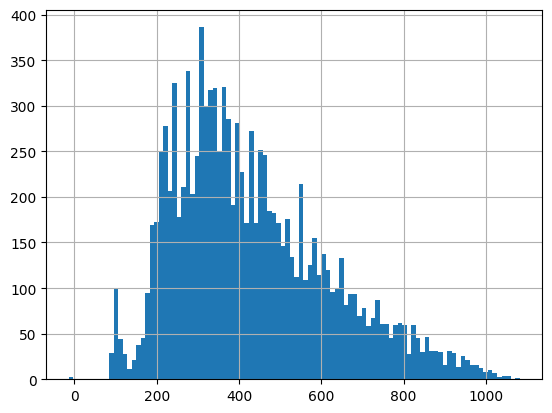

In [32]:
specidf['meddigbirta'] = specidf['TARGET_EVENT_DAY']-specidf['CONTRACT_DATE_OF_LOAN_AGREEMENT']
ddf = specidf[specidf['TARGET_EVENT'] == 'K']
ddf['meddigbirta'].hist(bins=100)

In [18]:
df['CONTRACT_DATE_OF_LOAN_AGREEMENT'].max()-df['CONTRACT_DATE_OF_LOAN_AGREEMENT'].min()

1094

<Axes: >

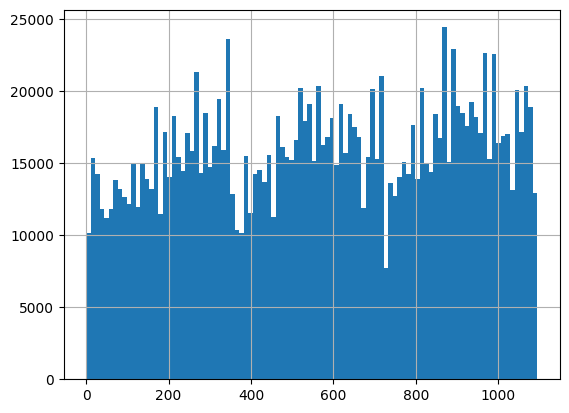

In [8]:
df['CONTRACT_DATE_OF_LOAN_AGREEMENT'].hist(bins=100)

<Axes: >

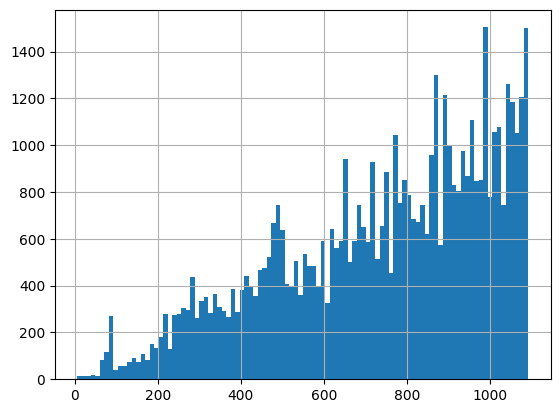

In [9]:
df['TARGET_EVENT_DAY'].hist(bins=100)

 modeA:
 első 365 nap adatából készítek tanító adathalmazt célváltozóval
 az utolsó 365 nap adatából ugyanezt, de ott nem lesz célváltozó
 modellt építek R1-en, optimalizálom, javítgatom, majd alkalmazom a beküldőn R2 adathalmazon

In [108]:
# előkészítés a tanításhoz, egy éves periódust nézve
eltolas = df['CONTRACT_DATE_OF_LOAN_AGREEMENT'].min()
df['CONTRACT_DATE_OF_LOAN_AGREEMENT'] = df['CONTRACT_DATE_OF_LOAN_AGREEMENT']-eltolas
df['TARGET_EVENT_DAY']=df['TARGET_EVENT_DAY']-eltolas
    

In [25]:
def datagen_modeA(origdf, startnap, endnap):
    df2 = origdf[origdf['CONTRACT_DATE_OF_LOAN_AGREEMENT']>=startnap].copy()
    df = df2[df2['CONTRACT_DATE_OF_LOAN_AGREEMENT']<endnap].copy()
    cust_df = pd.DataFrame({'BORROWER_ID':df['BORROWER_ID'].unique()})
    
    
    # TARGET VALTOZO 
    # a következő évben bekövetkező eseményeket nézzük
    # k: késedelmes lesz
    feltetel = (df['TARGET_EVENT_DAY']>endnap) & (df['TARGET_EVENT_DAY']<endnap+2*365) & (df['TARGET_EVENT'] == 'K')
    df['target'] = 0
    df.loc[feltetel,'target']=1
    
    stat = df.groupby('BORROWER_ID',as_index=False).agg({'target':'max'})
    # akik nem fizettek az 1 lesz
    cust_df = cust_df.merge(stat,on='BORROWER_ID',how='left')
    # mindenki más aki előtörlesztett vagy semmi nem történt az 0
    cust_df['target'] = cust_df['target'].fillna(0)
    
    
    # BEMENO VALTOZOK
    # törlesztőösszeg
    stat = df.groupby("BORROWER_ID", as_index=False).agg({'CONTRACT_INSTALMENT_AMOUNT':'sum','CONTRACT_INSTALMENT_AMOUNT_2':'sum'})
    stat.columns=['BORROWER_ID','contract_instalment','contract_instalment_2']
    cust_df = cust_df.merge(stat,on='BORROWER_ID',how='left')
    
    
    
    # hany hitele van ÖSSZESEN
    
    stat = df.groupby("BORROWER_ID", as_index=False).agg({'CONTRACT_ID':'count','CONTRACT_LOAN_AMOUNT':'sum'})
    
    stat.columns=['BORROWER_ID','in_contract_num','in_loan_amount_sum']
    cust_df = cust_df.merge(stat,on='BORROWER_ID',how='left')
    
    return cust_df
    
    #cust_df = pd.DataFrame({'BORROWER_ID':df['BORROWER_ID'].unique()})
    
    #target_df = origdf[origdf['CONTRACT_DATE_OF_LOAN_AGREEMENT']>=endnap]
    #target_df = target_df[target_df['CONTRACT_DATE_OF_LOAN_AGREEMENT']<endnap+2*365]
    #target_df['target_int'] = target_df['TARGET_EVENT'].map({'-':0,'E':0,'K':1})
    #stat = target_df.groupby('BORROWER_ID',as_index=False).agg({'target_int':'max'})
    #cust_df = cust_df.merge(stat,on='BORROWER_ID',how='left')
    
    #return cust_df

R1 = datagen_modeA(df,0,365)
R2 = datagen_modeA(df,365*2,365*3)

In [26]:
R1

,BORROWER_ID,target,contract_instalment,contract_instalment_2,in_contract_num,in_loan_amount_sum
0,d8SqtuEV,0,9545.0,25538.0,2,396086
1,lrdxML0g,0,9528.0,0.0,1,55590
2,gII7nnq4,0,8899.0,8880.0,1,275924
3,MMkJ8z/e,0,14329.0,12966.0,1,138862
4,M417onFP,0,4003.0,3901.0,1,169624
...,...,...,...,...,...,...
437017,pNIqzUE4,0,0.0,0.0,1,299931
437018,clBMCzqR,0,0.0,0.0,1,13293921
437019,WkX2GJQS,0,0.0,0.0,1,272812
437020,+5cUBKRc,0,0.0,0.0,1,272812


In [27]:
print(len(R1))
print(len(R2))

437022
487907


In [28]:
R1['target'].mean()

0.011452512688148423

In [49]:
R1['in_contract_num'].value_counts()

in_contract_num
1      384344
2       45053
3        6121
4        1171
5         260
6          42
7          13
8           6
9           6
11          2
421         1
14          1
13          1
12          1
Name: count, dtype: int64

In [44]:
df['CONTRACT_LOAN_AMOUNT'].value_counts()

CONTRACT_LOAN_AMOUNT
99         693
100        659
0          330
99423       34
99605       34
          ... 
896167       1
899479       1
790043       1
2903288      1
2853835      1
Name: count, Length: 835480, dtype: int64

mode B: változók hozzáadása az adathalmazhoz
előbb írjuk a célváltozót a df-be
hozzáadjuk a szükséges sorokat és a végén szűrünk a target maximmum 

In [ ]:
def datagen_modeA(origdf, startnap, endnap):
    df2 = origdf[origdf['CONTRACT_DATE_OF_LOAN_AGREEMENT']>=startnap].copy()
    df = df2[df2['CONTRACT_DATE_OF_LOAN_AGREEMENT']<endnap].copy()
    cust_df = pd.DataFrame({'BORROWER_ID':df['BORROWER_ID'].unique()})
    
    
    # TARGET VALTOZO 
    feltetel = (df['TARGET_EVENT_DAY']>endnap) & (df['TARGET_EVENT_DAY']<endnap+2*365) & (df['TARGET_EVENT'] == 'K')
    df['target'] = 0
    df.loc[feltetel,'target']=1
    
    stat = df.groupby('BORROWER_ID',as_index=False).agg({'target':'max'})
    cust_df = cust_df.merge(stat,on='BORROWER_ID',how='left')
    cust_df['target'] = cust_df['target'].fillna(0)
    
    
    # BEMENO VALTOZOK
    # törlesztőösszeg
    stat = df.groupby("BORROWER_ID", as_index=False).agg({'CONTRACT_INSTALMENT_AMOUNT':'sum','CONTRACT_INSTALMENT_AMOUNT_2':'sum'})
    stat.columns=['BORROWER_ID','contract_instalment','contract_instalment_2']
    cust_df = cust_df.merge(stat,on='BORROWER_ID',how='left')
    
    
    
    # hany hitele van ÖSSZESEN
    
    stat = df.groupby("BORROWER_ID", as_index=False).agg({'CONTRACT_ID':'count','CONTRACT_LOAN_AMOUNT':'sum'})
    
    stat.columns=['BORROWER_ID','in_contract_num','in_loan_amount_sum']
    cust_df = cust_df.merge(stat,on='BORROWER_ID',how='left')
    
    return cust_df
    
    #cust_df = pd.DataFrame({'BORROWER_ID':df['BORROWER_ID'].unique()})
    
    #target_df = origdf[origdf['CONTRACT_DATE_OF_LOAN_AGREEMENT']>=endnap]
    #target_df = target_df[target_df['CONTRACT_DATE_OF_LOAN_AGREEMENT']<endnap+2*365]
    #target_df['target_int'] = target_df['TARGET_EVENT'].map({'-':0,'E':0,'K':1})
    #stat = target_df.groupby('BORROWER_ID',as_index=False).agg({'target_int':'max'})
    #cust_df = cust_df.merge(stat,on='BORROWER_ID',how='left')
    
    #return cust_df

R1 = datagen_modeA(df,0,365)
R2 = datagen_modeA(df,365*2,365*3)

In [ ]:
result = df.groupby("BORROWER_ID", as_index=False).agg({'p':'sum'])
cust_df = pd.DataFrame({'BORROWER_ID':df['BORROWER_ID'].unique()})
cust_df = cust_df.merge(result,on='BORROWER_ID',how='left')

# modellépítés
# mode A:r1 felén tanulunk, másik felén tesztelünk, milyen loglosst kapunk?

In [29]:
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import GradientBoostingClassifier
#cross_val_predict(cv)

In [30]:
R1.columns

Index(['BORROWER_ID', 'target', 'contract_instalment', 'contract_instalment_2',
       'in_contract_num', 'in_loan_amount_sum'],
      dtype='object')

In [31]:
#import logloss
from sklearn.metrics import log_loss

bemeno_valtozok = ['in_contract_num','in_loan_amount_sum','contract_instalment', 'contract_instalment_2']
R1 = R1.reset_index(drop=True)
cv=2
R1['fold'] = R1.index % cv
loglosslist = []
for i in range(cv):
    train_df = R1[R1['fold']!=i]
    test_df = R1[R1['fold']==i]
    gbm = GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=42)
    gbm.fit(train_df[bemeno_valtozok],train_df['target'])
    test_df['p'] = gbm.predict_proba(test_df[bemeno_valtozok])[:,1]
    logloss = log_loss(test_df['target'],test_df['p'])
    print(i,logloss)
    loglosslist.append(logloss)



C:\Users\Máté\AppData\Local\Temp\ipykernel_12656\339012740.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['p'] = gbm.predict_proba(test_df[bemeno_valtozok])[:,1]


0 0.04495709196274065
1 0.045400789261662425


C:\Users\Máté\AppData\Local\Temp\ipykernel_12656\339012740.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['p'] = gbm.predict_proba(test_df[bemeno_valtozok])[:,1]


In [32]:
import numpy as np
print('ATLAGOS LOGLOSS:',np.mean(loglosslist))

ATLAGOS LOGLOSS: 0.04517894061220154


In [ ]:
#r1 = R1[R1['in_contract_num']<10]
#r2 = R2[R2['in_contract_num']<10]

In [33]:
gbm.fit(R1[bemeno_valtozok],R1['target'])

GradientBoostingClassifier(random_state=42)

In [34]:
R2['p'] = gbm.predict_proba(R2[bemeno_valtozok])[:,1]

In [46]:
R2['p'].mean()

0.011947330488506274

modellépítés mode_A 2.
XGBoost algorithms

In [62]:
%pip install xgboost

   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.8/99.7 MB 17.4 MB/s eta 0:00:06
    --------------------------------------- 1.9/99.7 MB 20.3 MB/s eta 0:00:05
   - -------------------------------------- 3.1/99.7 MB 22.4 MB/s eta 0:00:05
   - -------------------------------------- 4.4/99.7 MB 23.7 MB/s eta 0:00:05
   -- ------------------------------------- 5.9/99.7 MB 25.0 MB/s eta 0:00:04
   -- ------------------------------------- 7.4/99.7 MB 26.3 MB/s eta 0:00:04
   --- ------------------------------------ 8.9/99.7 MB 27.0 MB/s eta 0:00:04
   --- ------------------------------------ 9.9/99.7 MB 26.4 MB/s eta 0:00:04
   ---- ----------------------------------- 11.5/99.7 MB 28.5 MB/s eta 0:00:04
   ----- ---------------------------------- 13.3/99.7 MB 31.2 MB/s eta 0:00:03
   ------ --------------------------------- 15.0/99.7 MB 32.8 MB/s eta 0:00:03
   ------ --------------------------------- 16.7/99.7 MB 32.8 MB/s et

In [63]:
from xgboost import XGBClassifier

In [94]:
#import logloss
from sklearn.metrics import log_loss
# import XGBClassifier
from xgboost import XGBClassifier
# check accuracy score
from sklearn.metrics import accuracy_score


# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 1000,
            'alpha': 10,
            'learning_rate': 0.1,
            'n_estimators':1000
        }
            


bemeno_valtozok = ['in_contract_num','in_loan_amount_sum','contract_instalment', 'contract_instalment_2']
R1 = R1.reset_index(drop=True)
cv=2
#R1['fold'] = R1.index % cv
loglosslist = []
for i in range(cv):
    train_df = R1[R1['fold']!=i]
    test_df = R1[R1['fold']==i]
    xgb = XGBClassifier(**params)
    xgb.fit(train_df[bemeno_valtozok],train_df['target'])
   
    test_df['p'] = xgb.predict(test_df[bemeno_valtozok])
    logloss = log_loss(test_df['target'],test_df['p'])
    print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(test_df['target'],test_df['p'])))
    print(i,logloss)
    loglosslist.append(logloss)


C:\Users\Máté\AppData\Local\Temp\ipykernel_12656\1342295875.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['p'] = xgb.predict(test_df[bemeno_valtozok])


XGBoost model accuracy score: 0.9889
0 0.3986870694907634
XGBoost model accuracy score: 0.9888
1 0.4047902641830093


C:\Users\Máté\AppData\Local\Temp\ipykernel_12656\1342295875.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['p'] = xgb.predict(test_df[bemeno_valtozok])


In [90]:
import numpy as np
print('ATLAGOS LOGLOSS:',np.mean(loglosslist))

ATLAGOS LOGLOSS: 0.40553254461855265


In [68]:
xgb.fit(R1[bemeno_valtozok],R1['target'])

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [69]:
R2['p'] = xgb.predict(R2[bemeno_valtozok])

In [81]:
R2['p'].mean()

0.004244661380140067

modellépítés mode_a_3 RandomForestClassifier

In [98]:
#import logloss
from sklearn.metrics import log_loss
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# check accuracy score
from sklearn.metrics import accuracy_score

            


bemeno_valtozok = ['in_contract_num','in_loan_amount_sum','contract_instalment', 'contract_instalment_2']
R1 = R1.reset_index(drop=True)
cv=2
#R1['fold'] = R1.index % cv
loglosslist = []
for i in range(cv):
    train_df = R1[R1['fold']!=i]
    test_df = R1[R1['fold']==i]
    rf = RandomForestRegressor(n_estimators = 10, random_state = 42)
    rf.fit(train_df[bemeno_valtozok],train_df['target'])
   
    test_df['p'] = rf.predict(test_df[bemeno_valtozok])
    logloss = log_loss(test_df['target'],test_df['p'])
    
    print(i,logloss)
    loglosslist.append(logloss)

C:\Users\Máté\AppData\Local\Temp\ipykernel_12656\615151451.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['p'] = rf.predict(test_df[bemeno_valtozok])


0 0.1788863295068148
1 0.18276066177053


C:\Users\Máté\AppData\Local\Temp\ipykernel_12656\615151451.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['p'] = rf.predict(test_df[bemeno_valtozok])


In [99]:
rf.fit(R1[bemeno_valtozok],R1['target'])

RandomForestRegressor(n_estimators=10, random_state=42)

In [100]:
R2['p'] = rf.predict(R2[bemeno_valtozok])

In [101]:
R2['p'].mean()

0.012794101471523602

# átlag eltolása - mindegyiknél ugyanaz

In [ ]:
# alap sub 
# logloss = 0,0757266
# rocauc = 0.5

In [102]:
R2['p2'] = 1-R2['p']
R2['p2'] = R2['p2']*(1-0.0148)/(R2['p2'].mean())
R2['p3'] = 1-R2['p2']

In [103]:
subm2 = subm.merge(R2[['BORROWER_ID','p3']],on = 'BORROWER_ID',how='left')
subm2.loc[ ~subm2['p3'].isna(),'PRED']=subm2.loc[ ~subm2['p3'].isna(),'p3']
del subm2['p3']

In [104]:
subm2['PRED'].mean()

0.01448095489664485

In [86]:
subm['PRED'].mean()

0.014477000000000028

In [105]:
subm2.to_csv("proba_3_rf.csv",index=None)

In [69]:
subm['PRED'].mean()

0.014477000000000028

In [88]:
# RESULT
R2['p3'].mean()

0.014800000000000046